# LeNet Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./train.p"
validation_file="./valid.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print(X_valid.shape)

(4410, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [13]:
# Import numpy library
import numpy as np
from sklearn.model_selection import train_test_split

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.concatenate((y_train, y_valid, y_test))))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

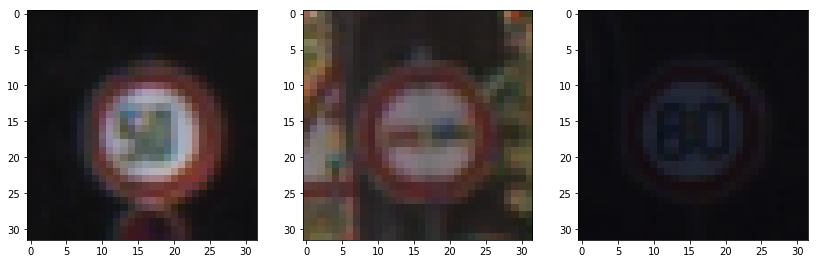

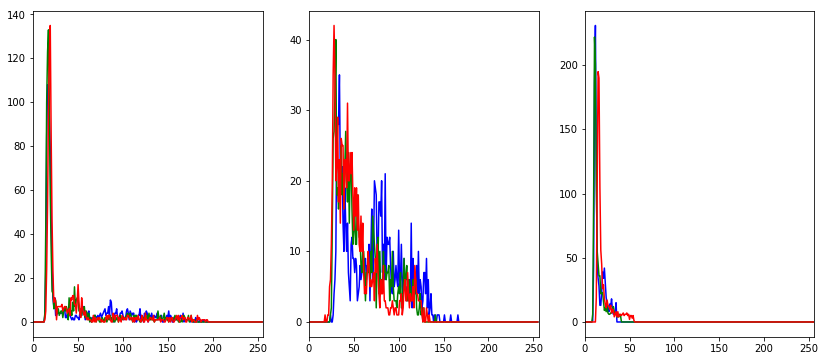

In [82]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from random import randint
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline


### Dataset Summary & Exploration 1: Get an initial look at what the images look like 
### Analysis: Signs seem to take up a good portion of the image
# Goal is to gain insight into our data. Visualize how important color channels are-- plot for a random sample of images,
# the different histograms for each channel

# Create a function to display n images together:
# n = number of images to display
# n_train = number of images available to display from set "imgs"
# imgs = set of images available to display
def printImages(n, n_train, imgs, **args ):
    if('image_indices' in args): 
        dis_img_indices = args["image_indices"]
    else: 
        dis_img_indices = [randint(0,n_train) for i in range(0,n)]   
    fig = plt.figure(figsize=(14,6))
    i = 1
    for img_index in dis_img_indices:
        fig.add_subplot(1,n,i)
        imgplot = plt.imshow(imgs[img_index])
        i+=1
    return dis_img_indices

def printColorHist(indices, imgs):
    figHist = plt.figure(figsize=(14,6))
    color = ('b','g','r')
    iCount=1
    for index in indices:
        figHist.add_subplot(1,len(indices),iCount)
        for i,col in enumerate(color):
            histr = cv2.calcHist([imgs[index]],[i],None,[256],[0,256])
            plt.plot(histr,color = col)
            plt.xlim([0,256])
        iCount += 1
    plt.show()
    
# Get RGB Channels of Original Images
# Print Original Images   
indices = printImages(3,n_train,X_train)
printColorHist(indices, X_train)

[9865, 31865, 14334]

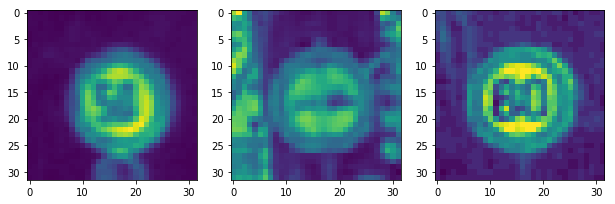

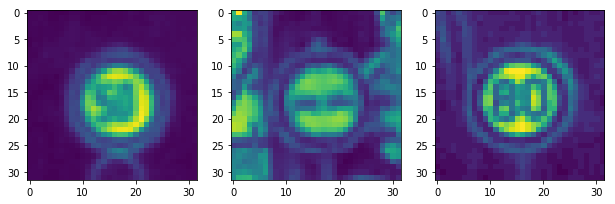

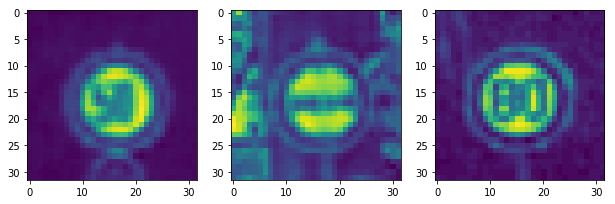

In [83]:
printImages(4,n_train,X_train[:,:,:,0],image_indices=indices)
printImages(4,n_train,X_train[:,:,:,1],image_indices=indices)
printImages(4,n_train,X_train[:,:,:,2],image_indices=indices)

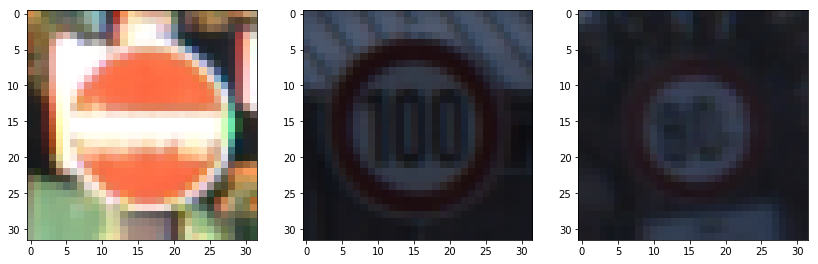

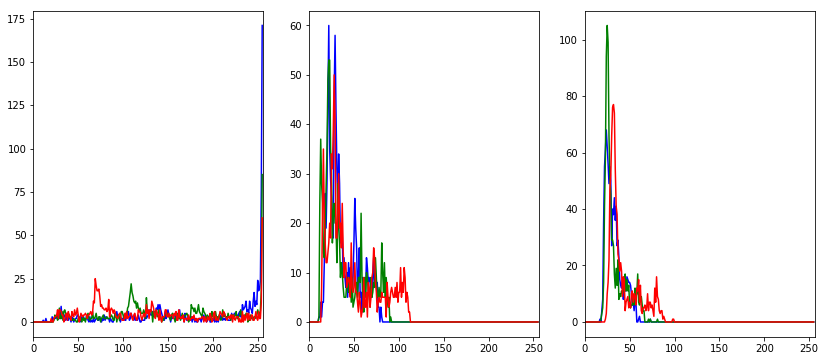

In [84]:
# Get RGB Channels of Original Images
# Print Original Images   
indices = printImages(3,n_train,X_train)
printColorHist(indices, X_train)

[26465, 19088, 27602]

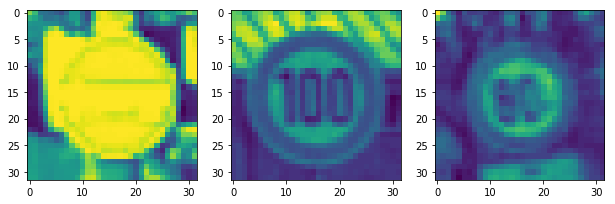

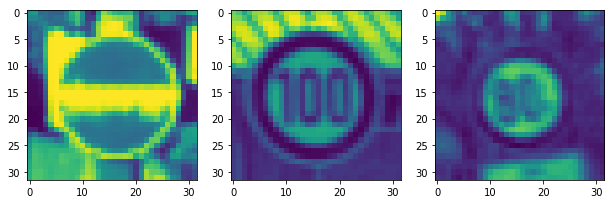

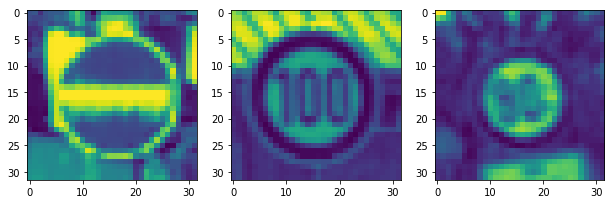

In [85]:
printImages(4,n_train,X_train[:,:,:,0],image_indices=indices)
printImages(4,n_train,X_train[:,:,:,1],image_indices=indices)
printImages(4,n_train,X_train[:,:,:,2],image_indices=indices)

30


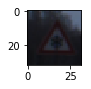

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

<Container object of 43 artists>

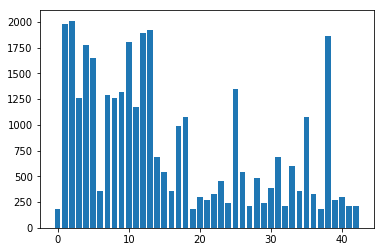

In [86]:
### Dataset Summary & Exploration 1: Get a Count of All the IMages
### Analysis: Looks like the distribution of signs aren't uniform, model might be biased towards certain signs
unique,counts = np.unique(y_train,return_counts=True)
plt.bar(unique, counts)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [6]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [7]:
from tensorflow.contrib.layers import flatten


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
        'wconv1': tf.Variable(tf.truncated_normal([5,5,3,6], mu, sigma)),
        'wconv2': tf.Variable(tf.truncated_normal([5,5,6,16], mu, sigma)),
        'wf3': tf.Variable(tf.truncated_normal([400,120], mu, sigma)),
        'wf4': tf.Variable(tf.truncated_normal([120,84], mu, sigma)),
        'wf5': tf.Variable(tf.truncated_normal([84,43], mu, sigma))
    }
    
    biases = {
        'bc1' : tf.Variable(tf.zeros(6)),
        'bc2' : tf.Variable(tf.zeros(16)),
        'bf3' : tf.Variable(tf.zeros(120)),   
        'bf4' : tf.Variable(tf.zeros(84)), 
        'bf5' : tf.Variable(tf.zeros(43))   
    }
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    hidden_layer = tf.nn.conv2d(x, weights['wconv1'], [1,1,1,1], 'VALID' ) + biases['bc1']
    # TODO: Activation.
    hidden_layer = tf.nn.relu(hidden_layer)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    hidden_layer = tf.nn.max_pool(hidden_layer, [1,2,2,1],[1,2,2,1],'VALID')
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    hidden_layer = tf.nn.conv2d(hidden_layer,weights['wconv2'],[1,1,1,1],'VALID') + biases['bc2']
    # TODO: Activation.
    hidden_layer = tf.nn.dropout(hidden_layer,0.6)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    hidden_layer = tf.nn.max_pool(hidden_layer, [1,2,2,1],[1,2,2,1],'VALID')
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    hidden_layer = flatten(hidden_layer)
    print(hidden_layer.shape, weights['wf3'].shape)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    hidden_layer = tf.add(tf.matmul(hidden_layer,weights['wf3']),biases['bf3'] )
    # TODO: Activation.
    hidden_layer = tf.sigmoid(hidden_layer)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    hidden_layer = tf.add(tf.matmul(hidden_layer,weights['wf4']),biases['bf4'] )    
    # TODO: Activation.
    hidden_layer = tf.nn.relu(hidden_layer)    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    hidden_layer = tf.add(tf.matmul(hidden_layer,weights['wf5']),biases['bf5'] )
    
    return hidden_layer

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [9]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

(?, 400) (400, 120)


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.549

EPOCH 2 ...
Validation Accuracy = 0.742

EPOCH 3 ...
Validation Accuracy = 0.780

EPOCH 4 ...
Validation Accuracy = 0.795

EPOCH 5 ...
Validation Accuracy = 0.808

EPOCH 6 ...
Validation Accuracy = 0.819

EPOCH 7 ...
Validation Accuracy = 0.841

EPOCH 8 ...
Validation Accuracy = 0.854

EPOCH 9 ...
Validation Accuracy = 0.839

EPOCH 10 ...
Validation Accuracy = 0.857

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [43]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.988
